In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Data Preprocessing

In [183]:
# Upload data to session storage and load it
data = pd.read_csv('MP2_Data.csv')
data.drop('ID', inplace=True, axis=1)
data

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,82.97,...,0,5,4,0,4,8,6,1,0,4
1,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,82.43,...,8,5,2,0,0,25,3,2,5,4
2,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,79.44,...,0,8,2,0,0,9,0,1,0,3
3,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,80.65,...,4,10,0,0,0,7,6,0,0,3
4,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,67.68,...,6,8,5,1,1,5,3,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,...,0,28,0,22,0,1,0,0,0,0
103,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,...,0,0,0,0,0,3,0,0,0,0
104,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,...,0,0,0,0,0,0,0,0,0,0
105,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,...,0,0,0,0,0,6,0,0,0,0


In [184]:
data.describe()

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,...,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,2.406636,7.949626,2.803738,9.237757,2.844673,14.481869,2.383178,2.609439,2.663551,47.380467,...,1.252336,10.514019,3.130841,1.112150,0.355140,7.663551,1.607477,1.093458,0.046729,2.074766
std,2.000317,6.892312,2.493158,8.640610,2.482099,14.080211,2.437501,2.229419,2.414359,41.035589,...,2.399267,15.563846,4.841028,3.658351,1.191577,9.277630,2.687346,3.368928,0.483368,1.993863
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.330000,12.000000,5.000000,10.870000,5.000000,15.910000,2.500000,3.170000,4.000000,71.530000,...,0.000000,5.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,3.000000
75%,4.170000,14.305000,5.000000,18.045000,5.000000,27.440000,5.000000,4.710000,5.000000,83.550000,...,2.000000,14.000000,5.000000,0.000000,0.000000,11.000000,2.000000,0.500000,0.000000,4.000000
max,5.000000,15.000000,5.000000,20.000000,5.000000,35.000000,5.000000,5.000000,5.000000,99.710000,...,12.000000,90.000000,27.000000,22.000000,9.000000,62.000000,12.000000,25.000000,5.000000,5.000000


In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 47 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Week2_Quiz1  107 non-null    float64
 1   Week3_MP1    107 non-null    float64
 2   Week3_PR1    107 non-null    float64
 3   Week5_MP2    107 non-null    float64
 4   Week5_PR2    107 non-null    float64
 5   Week7_MP3    107 non-null    float64
 6   Week7_PR3    107 non-null    float64
 7   Week4_Quiz2  107 non-null    float64
 8   Week6_Quiz3  107 non-null    float64
 9   Week8_Total  107 non-null    float64
 10  Week1_Stat0  107 non-null    int64  
 11  Week1_Stat1  107 non-null    int64  
 12  Week1_Stat2  107 non-null    int64  
 13  Week1_Stat3  107 non-null    int64  
 14  Week2_Stat0  107 non-null    int64  
 15  Week2_Stat1  107 non-null    int64  
 16  Week2_Stat2  107 non-null    int64  
 17  Week2_Stat3  107 non-null    int64  
 18  Week3_Stat0  107 non-null    int64  
 19  Week3_St

In [186]:
data.isna().sum()
# No missing values

,0
Week2_Quiz1,0
Week3_MP1,0
Week3_PR1,0
Week5_MP2,0
Week5_PR2,0
Week7_MP3,0
Week7_PR3,0
Week4_Quiz2,0
Week6_Quiz3,0
Week8_Total,0


In [187]:
# Correlation before removing and accumulationg columns
data.corr()['Grade'].sort_values(ascending=False)

,Grade
Grade,1.000000
Week8_Total,0.972348
Week7_MP3,0.968130
Week5_MP2,0.953488
Week5_PR2,0.907837
Week3_MP1,0.901788
Week3_PR1,0.887352
Week7_PR3,0.865616
Week6_Quiz3,0.849920
Week4_Quiz2,0.810920


In [188]:
# Grouping all MP results into one, same with quizzes and peer reviews
data['MP'] = data[['Week3_MP1', 'Week5_MP2', 'Week7_MP3']].sum(axis=1)
data.drop(['Week3_MP1', 'Week5_MP2', 'Week7_MP3'], inplace=True, axis=1)

data['Quiz'] = data[['Week2_Quiz1', 'Week4_Quiz2', 'Week6_Quiz3']].sum(axis=1)
data.drop(['Week2_Quiz1', 'Week4_Quiz2', 'Week6_Quiz3'], inplace=True, axis=1)

data['Peer'] = data[['Week3_PR1', 'Week5_PR2', 'Week7_PR3']].sum(axis=1)
data.drop(['Week3_PR1', 'Week5_PR2', 'Week7_PR3'], inplace=True, axis=1)

In [189]:
# Dropping columns which are not significant. Since there are some columns which have very high correlation, I will drop everything with correlation lower than |0.4|
# Week1_Stat1 is 0 for everyone, so no variance; Week8_Total is almost the same as grade, so it will be removed
columns_to_drop = [
    'Week1_Stat1', 'Week3_Stat2', 'Week1_Stat2', 'Week8_Stat2', 'Week1_Stat3', 'Week5_Stat2', 'Week7_Stat2',
    'Week9_Stat3', 'Week9_Stat2', 'Week4_Stat2', 'Week8_Total',
    'Week2_Stat0', 'Week2_Stat2', 'Week6_Stat2', 'Week4_Stat3',
    'Week6_Stat3', 'Week5_Stat3', 'Week1_Stat0', 'Week8_Stat3',
    'Week3_Stat3', 'Week2_Stat3'
]

In [190]:
# Grouping stats by weeks, only accumulating columns that are not in the drop list
for i in range(1, 10):
    # Select columns for the current week that are not in the drop list
    week_columns = [f'Week{i}_Stat{j}' for j in range(4) if f'Week{i}_Stat{j}' not in columns_to_drop]

    # If there are columns to accumulate, calculate the sum and drop the original columns
    if week_columns:
        data[f'Week{i}_Stat'] = data[week_columns].sum(axis=1)
        data.drop(week_columns, inplace=True, axis=1)

In [191]:
df = data.drop([col for col in columns_to_drop if col in data.columns], axis=1)
print(df.columns)

Index(['Grade', 'MP', 'Quiz', 'Peer', 'Week2_Stat', 'Week3_Stat', 'Week4_Stat',
       'Week5_Stat', 'Week6_Stat', 'Week7_Stat', 'Week8_Stat', 'Week9_Stat'],
      dtype='object')


In [192]:
# Correlation after dropping and accumulating
df.corr()['Grade'].sort_values(ascending=False)

,Grade
Grade,1.000000
MP,0.981128
Peer,0.925995
Quiz,0.850059
Week6_Stat,0.697617
Week4_Stat,0.679393
Week3_Stat,0.665728
Week5_Stat,0.591442
Week9_Stat,0.578879
Week8_Stat,0.514961


Text(0, 0.5, 'Count')

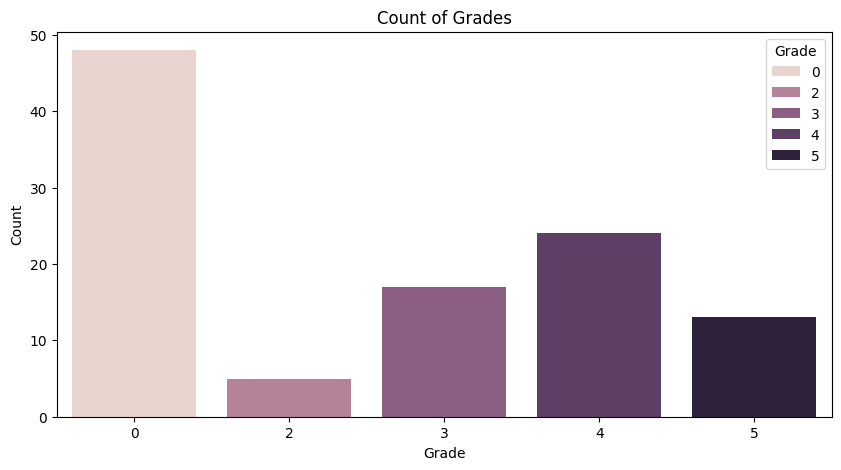

In [193]:
# Bar plot of frequency of grades
plt.figure(figsize=(10, 5))
sns.countplot(x='Grade', data=df, hue='Grade')
plt.title('Count of Grades')
plt.xlabel('Grade')
plt.ylabel('Count')

# Data split: Training and Test sets

In [194]:
# Global variables to keep track of the best model and metrics
best_model = None
best_accuracy = 0
best_class_report = None
best_cm = None

In [195]:
X = df.drop('Grade', axis=1)
y = df['Grade']

print(X.shape)
print(y.shape)

(107, 11)
(107,)


In [196]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

def cross_validate_model(model, y=y):
  # Lists to store metrics for each fold
  accuracy_scores = []
  mse_scores = []
  r2_scores = []

  # Lists to collect true and predicted values across all folds
  all_y_true = []
  all_y_pred = []

  # Cross-validation
  for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions and round numbers (in case of regression model)
    y_pred = model.predict(X_test)
    y_pred_class = np.round(y_pred).astype(int)
    y_pred_class = np.clip(y_pred_class, 0, 5)

    # Collect predictions and true values
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred_class)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_class)
    mse = mean_squared_error(y_test, y_pred_class)
    r2 = r2_score(y_test, y_pred_class)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    mse_scores.append(mse)
    r2_scores.append(r2)

  # Calculate mean metrics across folds
  mean_accuracy = np.mean(accuracy_scores)
  mean_mse = np.mean(mse_scores)
  mean_r2 = np.mean(r2_scores)

  evaluate_results(mean_accuracy, mean_mse, mean_r2, all_y_true, all_y_pred, model)

  return mean_accuracy, mean_mse, mean_r2

# Printing results, classification report and confusion matrix
def evaluate_results(mean_accuracy, mean_mse, mean_r2, all_y_true, all_y_pred, model):
  global best_accuracy, best_model, best_class_report, best_cm

  print(f"Mean Accuracy: {mean_accuracy}")
  print(f"Mean MSE: {mean_mse}")
  print(f"Mean R2: {mean_r2}")

  class_report = classification_report(all_y_true, all_y_pred, zero_division=0.0)
  print(class_report)

  cm = confusion_matrix(all_y_true, all_y_pred)
  # Renaming columns so they represent grades
  try:
    cm = pd.DataFrame(cm, index=['0', '2', '3', '4', '5'], columns=['0', '2', '3', '4', '5'])
  except:
      pass
  sns.heatmap(cm, annot=True, cmap='coolwarm')
  plt.show()

  if mean_accuracy > best_accuracy:
    best_accuracy = mean_accuracy
    best_model = model
    best_class_report = class_report
    best_cm = cm

# Visualizing accuracies with different number of estimators
def visualize(accuracies, n_estimators, title):
  plt.figure(figsize=(10, 6))
  plt.plot(n_estimators, accuracies, marker='o')
  plt.title(f'Accuracy vs. Number of Estimators - {title}')
  plt.xlabel('Number of Estimators')
  plt.ylabel('Accuracy')

# Model Training & Performance Evaluation

In [197]:
results = pd.DataFrame(columns=['Model', 'n', 'MSE', 'R2', 'Accuracy'])

n_estimators = [100, 200, 300, 400, 500]

## Regression

Mean Accuracy: 0.8796536796536797
Mean MSE: 0.1476190476190476
Mean R2: 0.9621888561090819
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           2       0.67      0.80      0.73         5
           3       0.73      0.65      0.69        17
           4       0.79      0.79      0.79        24
           5       0.92      0.92      0.92        13

    accuracy                           0.88       107
   macro avg       0.82      0.83      0.82       107
weighted avg       0.88      0.88      0.88       107



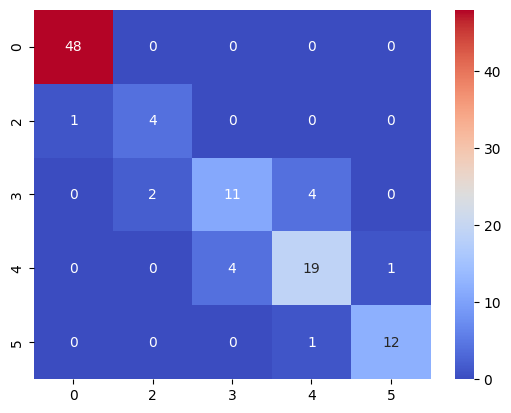

Mean Accuracy: 0.8796536796536797
Mean MSE: 0.1476190476190476
Mean R2: 0.9621888561090819
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           2       0.67      0.80      0.73         5
           3       0.73      0.65      0.69        17
           4       0.79      0.79      0.79        24
           5       0.92      0.92      0.92        13

    accuracy                           0.88       107
   macro avg       0.82      0.83      0.82       107
weighted avg       0.88      0.88      0.88       107



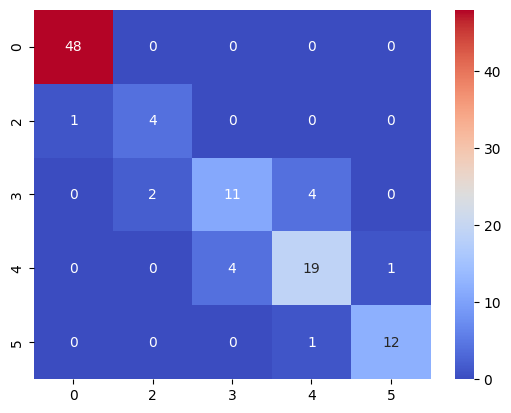

Mean Accuracy: 0.8796536796536797
Mean MSE: 0.1476190476190476
Mean R2: 0.9621888561090819
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           2       0.67      0.80      0.73         5
           3       0.73      0.65      0.69        17
           4       0.79      0.79      0.79        24
           5       0.92      0.92      0.92        13

    accuracy                           0.88       107
   macro avg       0.82      0.83      0.82       107
weighted avg       0.88      0.88      0.88       107



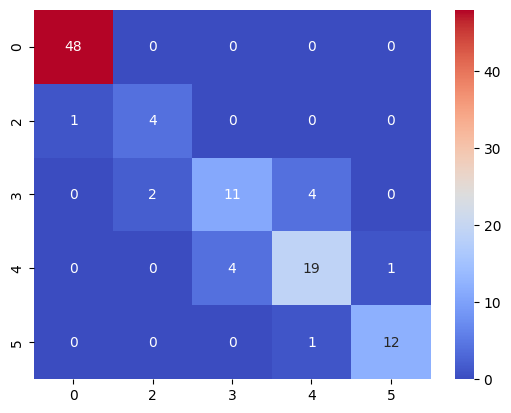

Mean Accuracy: 0.8796536796536797
Mean MSE: 0.1476190476190476
Mean R2: 0.9621888561090819
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           2       0.67      0.80      0.73         5
           3       0.73      0.65      0.69        17
           4       0.79      0.79      0.79        24
           5       0.92      0.92      0.92        13

    accuracy                           0.88       107
   macro avg       0.82      0.83      0.82       107
weighted avg       0.88      0.88      0.88       107



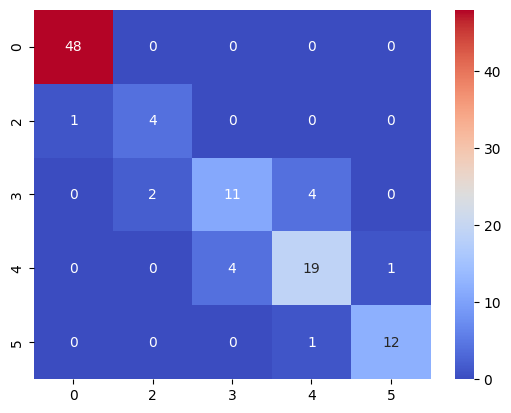

Mean Accuracy: 0.8796536796536797
Mean MSE: 0.1476190476190476
Mean R2: 0.9621888561090819
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           2       0.67      0.80      0.73         5
           3       0.73      0.65      0.69        17
           4       0.79      0.79      0.79        24
           5       0.92      0.92      0.92        13

    accuracy                           0.88       107
   macro avg       0.82      0.83      0.82       107
weighted avg       0.88      0.88      0.88       107



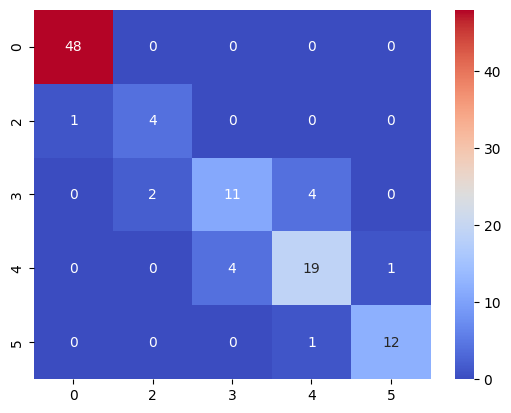

In [198]:
accuracies = []

for n in n_estimators:
  xgb_r_model = XGBRegressor(n_estimators=n, random_state=42)

  mean_accuracy, mean_mse, mean_r2 = cross_validate_model(xgb_r_model)
  accuracies.append(mean_accuracy)

  results.loc[len(results)] = ['XGBoost Regressor', n, mean_mse, mean_r2, mean_accuracy]

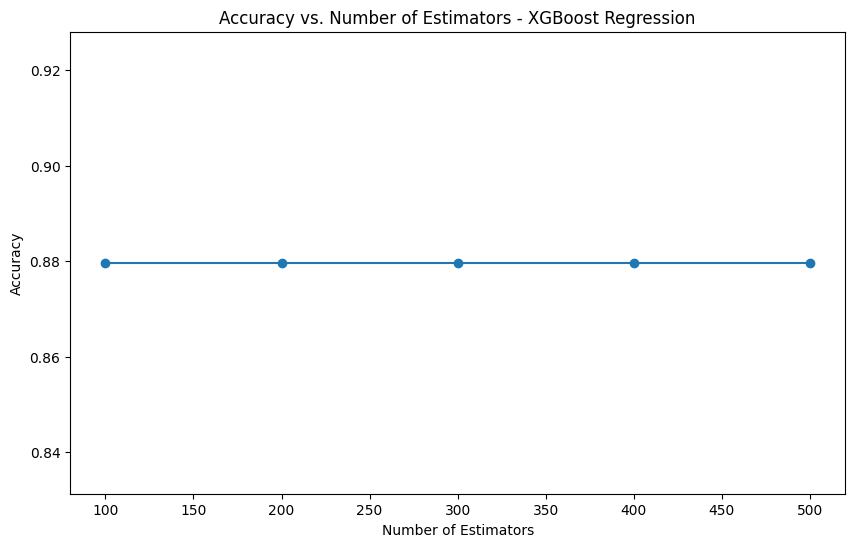

In [199]:
visualize(accuracies, n_estimators, "XGBoost Regression")

Mean Accuracy: 0.86017316017316
Mean MSE: 0.1398268398268398
Mean R2: 0.9650509581560713
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.00      0.00      0.00         0
           2       0.75      0.60      0.67         5
           3       0.68      0.76      0.72        17
           4       0.81      0.71      0.76        24
           5       0.80      0.92      0.86        13

    accuracy                           0.86       107
   macro avg       0.67      0.66      0.67       107
weighted avg       0.87      0.86      0.86       107



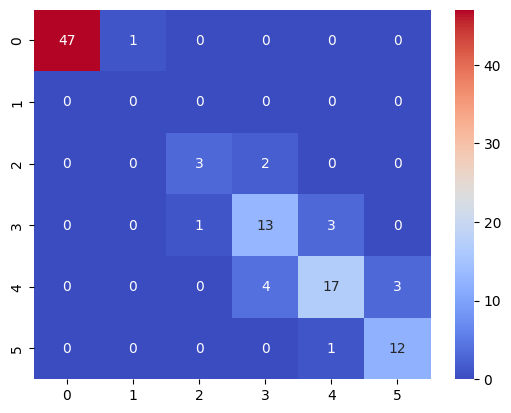

Mean Accuracy: 0.86017316017316
Mean MSE: 0.1398268398268398
Mean R2: 0.9650509581560713
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.00      0.00      0.00         0
           2       0.75      0.60      0.67         5
           3       0.68      0.76      0.72        17
           4       0.81      0.71      0.76        24
           5       0.80      0.92      0.86        13

    accuracy                           0.86       107
   macro avg       0.67      0.66      0.67       107
weighted avg       0.87      0.86      0.86       107



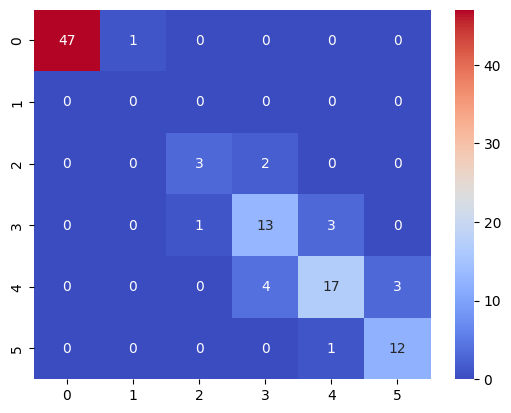

Mean Accuracy: 0.86017316017316
Mean MSE: 0.1398268398268398
Mean R2: 0.9650509581560713
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.00      0.00      0.00         0
           2       0.75      0.60      0.67         5
           3       0.68      0.76      0.72        17
           4       0.81      0.71      0.76        24
           5       0.80      0.92      0.86        13

    accuracy                           0.86       107
   macro avg       0.67      0.66      0.67       107
weighted avg       0.87      0.86      0.86       107



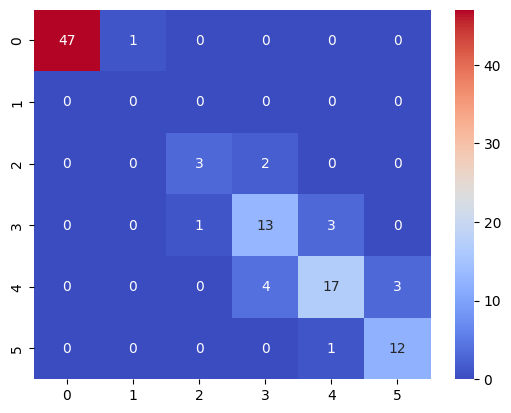

Mean Accuracy: 0.86017316017316
Mean MSE: 0.1398268398268398
Mean R2: 0.9650509581560713
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.00      0.00      0.00         0
           2       0.75      0.60      0.67         5
           3       0.68      0.76      0.72        17
           4       0.81      0.71      0.76        24
           5       0.80      0.92      0.86        13

    accuracy                           0.86       107
   macro avg       0.67      0.66      0.67       107
weighted avg       0.87      0.86      0.86       107



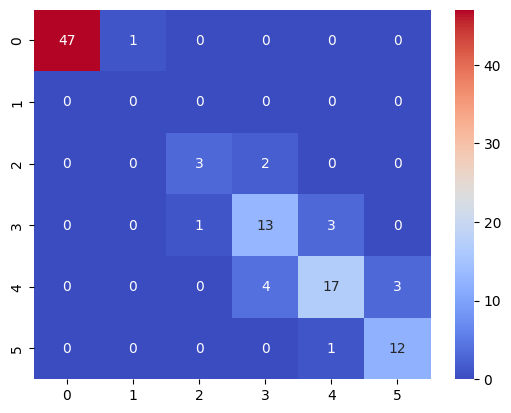

Mean Accuracy: 0.86017316017316
Mean MSE: 0.1398268398268398
Mean R2: 0.9650509581560713
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.00      0.00      0.00         0
           2       0.75      0.60      0.67         5
           3       0.68      0.76      0.72        17
           4       0.81      0.71      0.76        24
           5       0.80      0.92      0.86        13

    accuracy                           0.86       107
   macro avg       0.67      0.66      0.67       107
weighted avg       0.87      0.86      0.86       107



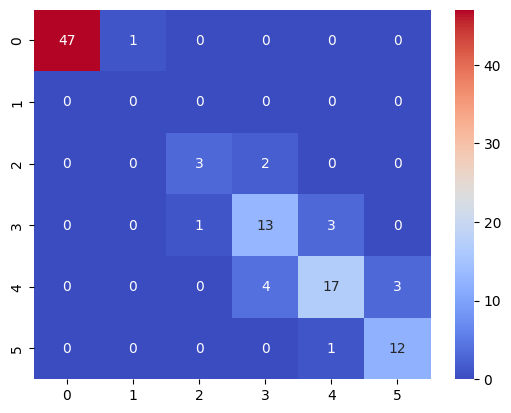

In [200]:
accuracies = []

for n in n_estimators:
  rf_r_model = RandomForestRegressor(n_estimators=n, random_state=42)

  mean_accuracy, mean_mse, mean_r2 = cross_validate_model(rf_r_model)
  accuracies.append(mean_accuracy)

  results.loc[len(results)] = ['RF Regressor', n, mean_mse, mean_r2, mean_accuracy]

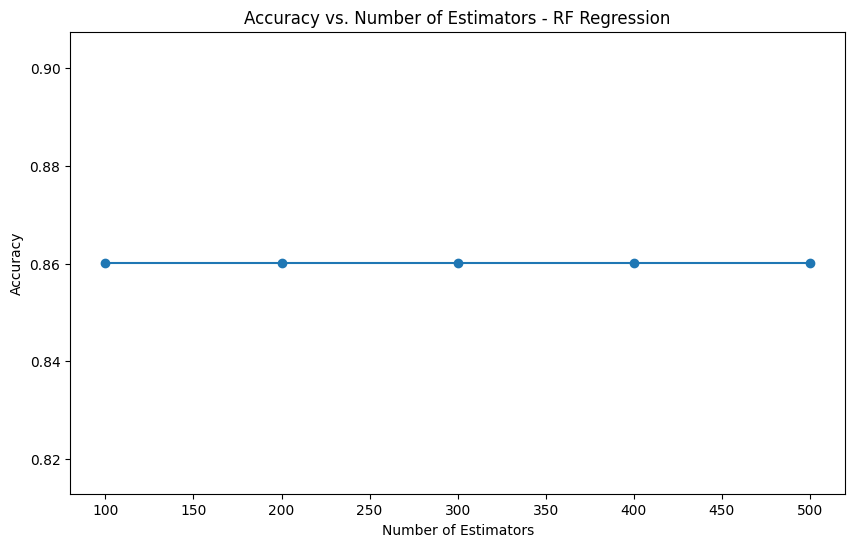

In [201]:
visualize(accuracies, n_estimators, "RF Regression")

## Classification

Mean Accuracy: 0.8129870129870129
Mean MSE: 0.2155844155844156
Mean R2: 0.9069357074248705
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       0.60      0.60      0.60         5
           2       0.67      0.59      0.62        17
           3       0.63      0.71      0.67        24
           4       0.82      0.69      0.75        13

    accuracy                           0.81       107
   macro avg       0.74      0.72      0.73       107
weighted avg       0.81      0.81      0.81       107



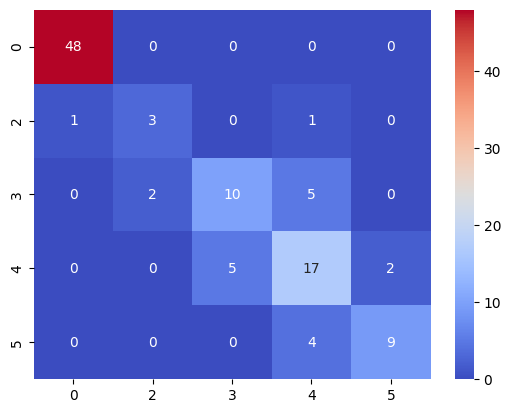

Mean Accuracy: 0.8129870129870129
Mean MSE: 0.2155844155844156
Mean R2: 0.9069357074248705
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       0.60      0.60      0.60         5
           2       0.67      0.59      0.62        17
           3       0.63      0.71      0.67        24
           4       0.82      0.69      0.75        13

    accuracy                           0.81       107
   macro avg       0.74      0.72      0.73       107
weighted avg       0.81      0.81      0.81       107



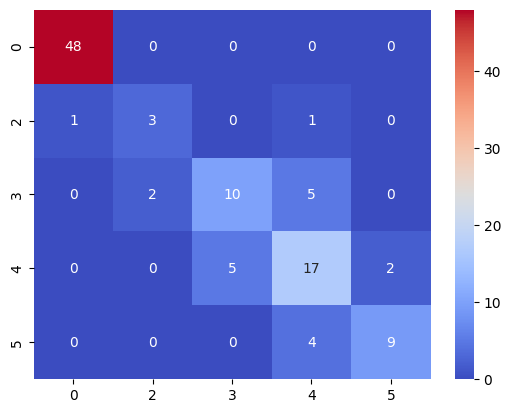

Mean Accuracy: 0.8129870129870129
Mean MSE: 0.2155844155844156
Mean R2: 0.9069357074248705
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       0.60      0.60      0.60         5
           2       0.67      0.59      0.62        17
           3       0.63      0.71      0.67        24
           4       0.82      0.69      0.75        13

    accuracy                           0.81       107
   macro avg       0.74      0.72      0.73       107
weighted avg       0.81      0.81      0.81       107



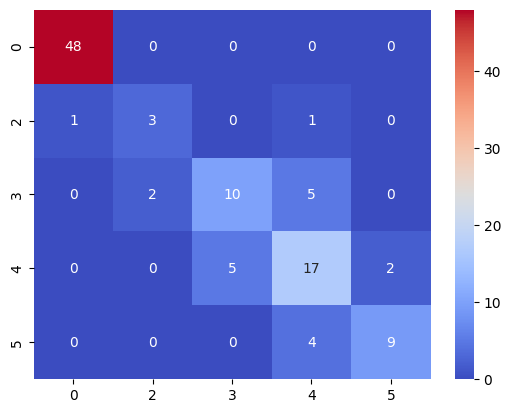

Mean Accuracy: 0.8129870129870129
Mean MSE: 0.2155844155844156
Mean R2: 0.9069357074248705
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       0.60      0.60      0.60         5
           2       0.67      0.59      0.62        17
           3       0.63      0.71      0.67        24
           4       0.82      0.69      0.75        13

    accuracy                           0.81       107
   macro avg       0.74      0.72      0.73       107
weighted avg       0.81      0.81      0.81       107



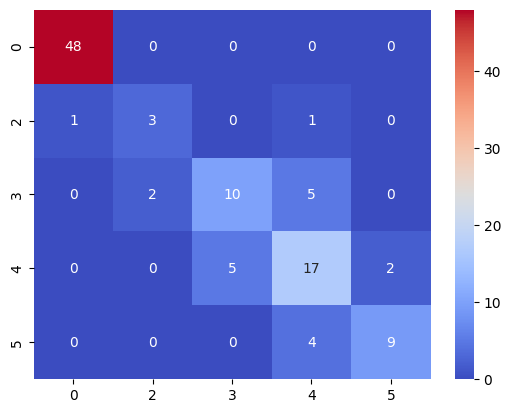

Mean Accuracy: 0.8129870129870129
Mean MSE: 0.2155844155844156
Mean R2: 0.9069357074248705
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       0.60      0.60      0.60         5
           2       0.67      0.59      0.62        17
           3       0.63      0.71      0.67        24
           4       0.82      0.69      0.75        13

    accuracy                           0.81       107
   macro avg       0.74      0.72      0.73       107
weighted avg       0.81      0.81      0.81       107



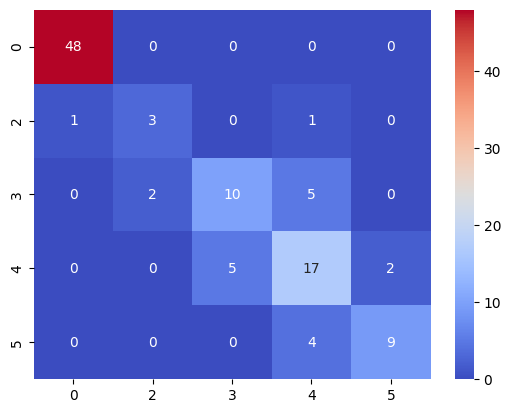

In [202]:
accuracies = []

for n in n_estimators:
  xgb_c_model = XGBClassifier(n_estimators=n, random_state=42)

  le = LabelEncoder()
  y_remapped = le.fit_transform(y)
  y_remapped = pd.Series(y_remapped)

  mean_accuracy, mean_mse, mean_r2 = cross_validate_model(xgb_c_model, y_remapped)
  accuracies.append(mean_accuracy)

  results.loc[len(results)] = ['XGBoost Classifier', n, mean_mse, mean_r2, mean_accuracy]

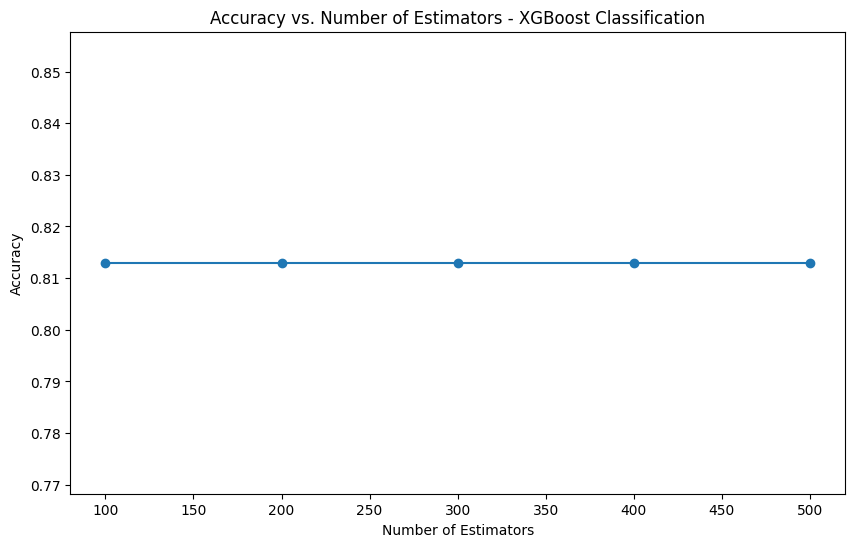

In [203]:
visualize(accuracies, n_estimators, "XGBoost Classification")

Mean Accuracy: 0.7757575757575756
Mean MSE: 0.47099567099567097
Mean R2: 0.8846296620857019
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           2       0.50      0.20      0.29         5
           3       0.50      0.41      0.45        17
           4       0.62      0.75      0.68        24
           5       0.69      0.69      0.69        13

    accuracy                           0.78       107
   macro avg       0.66      0.61      0.62       107
weighted avg       0.77      0.78      0.77       107



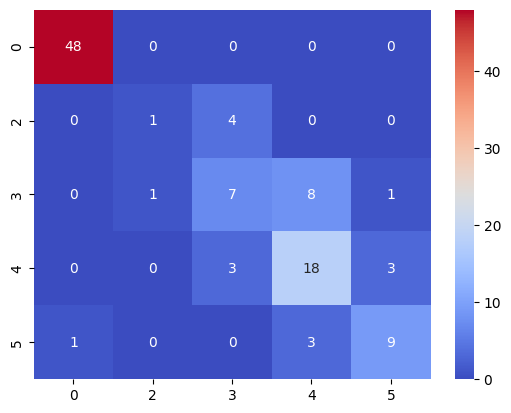

Mean Accuracy: 0.7943722943722943
Mean MSE: 0.4809523809523809
Mean R2: 0.8814640095552541
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           2       0.50      0.20      0.29         5
           3       0.62      0.47      0.53        17
           4       0.63      0.79      0.70        24
           5       0.69      0.69      0.69        13

    accuracy                           0.79       107
   macro avg       0.68      0.63      0.64       107
weighted avg       0.79      0.79      0.78       107



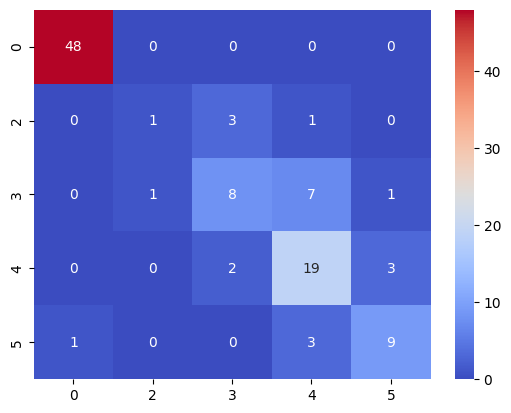

Mean Accuracy: 0.7943722943722943
Mean MSE: 0.4523809523809524
Mean R2: 0.8895099865667483
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           2       0.50      0.20      0.29         5
           3       0.56      0.53      0.55        17
           4       0.67      0.75      0.71        24
           5       0.69      0.69      0.69        13

    accuracy                           0.79       107
   macro avg       0.68      0.63      0.64       107
weighted avg       0.79      0.79      0.79       107



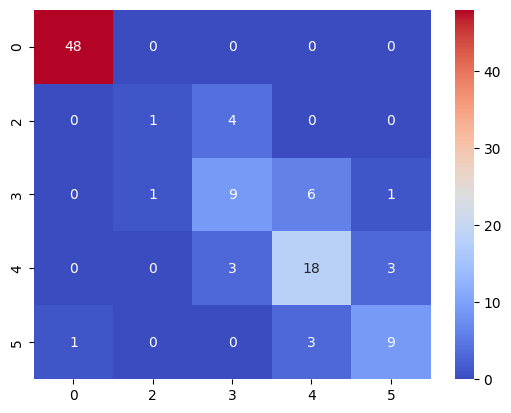

Mean Accuracy: 0.8038961038961038
Mean MSE: 0.41428571428571426
Mean R2: 0.8987509106591574
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           2       0.50      0.20      0.29         5
           3       0.59      0.59      0.59        17
           4       0.67      0.75      0.71        24
           5       0.75      0.69      0.72        13

    accuracy                           0.80       107
   macro avg       0.70      0.65      0.66       107
weighted avg       0.80      0.80      0.80       107



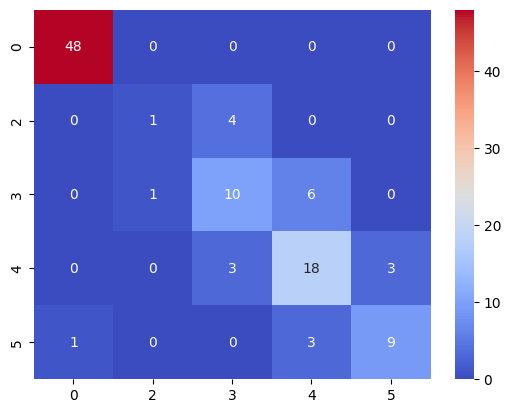

Mean Accuracy: 0.8043290043290042
Mean MSE: 0.4138528138528138
Mean R2: 0.8985298104898043
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           2       1.00      0.20      0.33         5
           3       0.59      0.59      0.59        17
           4       0.63      0.79      0.70        24
           5       0.80      0.62      0.70        13

    accuracy                           0.80       107
   macro avg       0.80      0.64      0.66       107
weighted avg       0.82      0.80      0.80       107



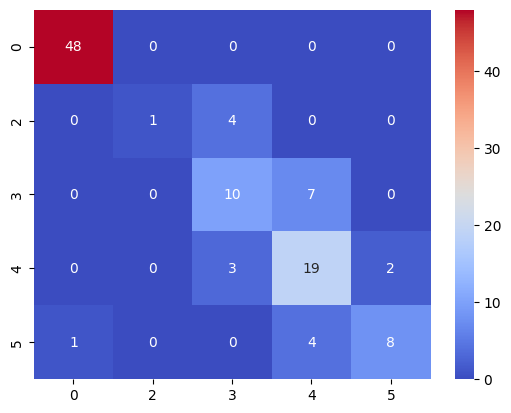

In [204]:
accuracies = []

for n in n_estimators:
  rf_c_model = RandomForestClassifier(n_estimators=n, random_state=42)

  mean_accuracy, mean_mse, mean_r2 = cross_validate_model(rf_c_model)
  accuracies.append(mean_accuracy)

  results.loc[len(results)] = ['RF Classifier', n, mean_mse, mean_r2, mean_accuracy]

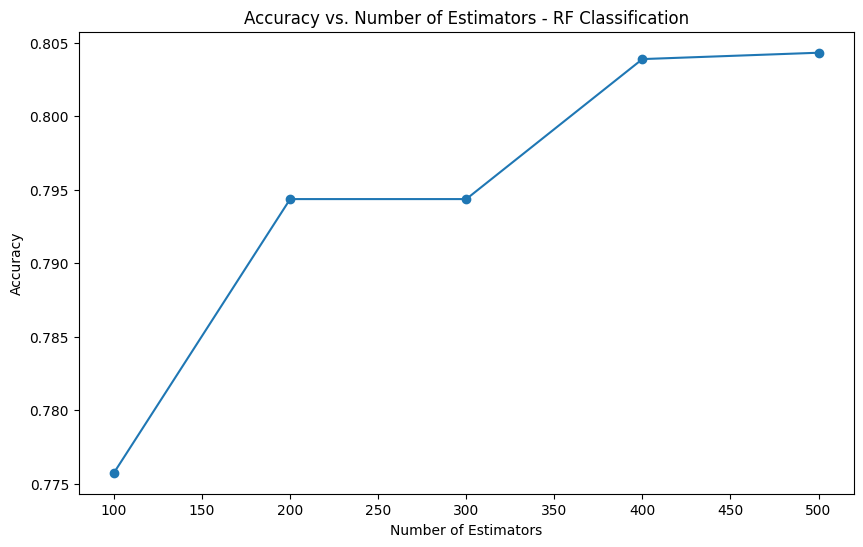

In [205]:
visualize(accuracies, n_estimators, "RF Classification")

# Results & Analysis

In [206]:
results

,Model,n,MSE,R2,Accuracy
0,XGBoost Regressor,100,0.147619,0.962189,0.879654
1,XGBoost Regressor,200,0.147619,0.962189,0.879654
2,XGBoost Regressor,300,0.147619,0.962189,0.879654
3,XGBoost Regressor,400,0.147619,0.962189,0.879654
4,XGBoost Regressor,500,0.147619,0.962189,0.879654
5,RF Regressor,100,0.139827,0.965051,0.860173
6,RF Regressor,200,0.139827,0.965051,0.860173
7,RF Regressor,300,0.139827,0.965051,0.860173
8,RF Regressor,400,0.139827,0.965051,0.860173
9,RF Regressor,500,0.139827,0.965051,0.860173


In [207]:
results.sort_values(by='Accuracy', ascending=False)

,Model,n,MSE,R2,Accuracy
0,XGBoost Regressor,100,0.147619,0.962189,0.879654
2,XGBoost Regressor,300,0.147619,0.962189,0.879654
3,XGBoost Regressor,400,0.147619,0.962189,0.879654
4,XGBoost Regressor,500,0.147619,0.962189,0.879654
1,XGBoost Regressor,200,0.147619,0.962189,0.879654
5,RF Regressor,100,0.139827,0.965051,0.860173
6,RF Regressor,200,0.139827,0.965051,0.860173
7,RF Regressor,300,0.139827,0.965051,0.860173
8,RF Regressor,400,0.139827,0.965051,0.860173
9,RF Regressor,500,0.139827,0.965051,0.860173


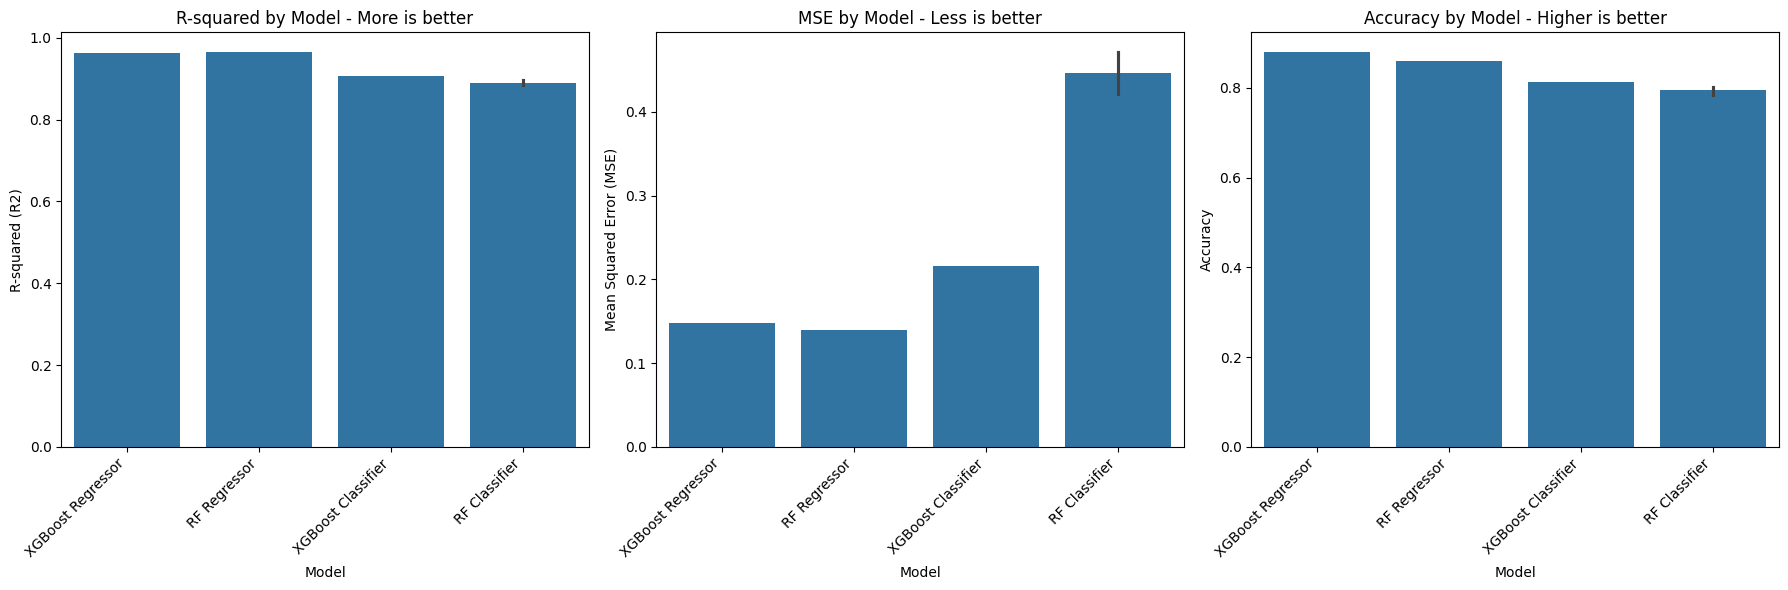

In [208]:
# R-squared by model
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='R2', data=results)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model')
plt.ylabel('R-squared (R2)')
_ = plt.title('R-squared by Model - More is better')

# MSE by model
plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='MSE', data=results)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
_ = plt.title('MSE by Model - Less is better')

# Accuracy by model
plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='Accuracy', data=results)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model')
plt.ylabel('Accuracy')
_ = plt.title('Accuracy by Model - Higher is better')

plt.tight_layout()
plt.show()

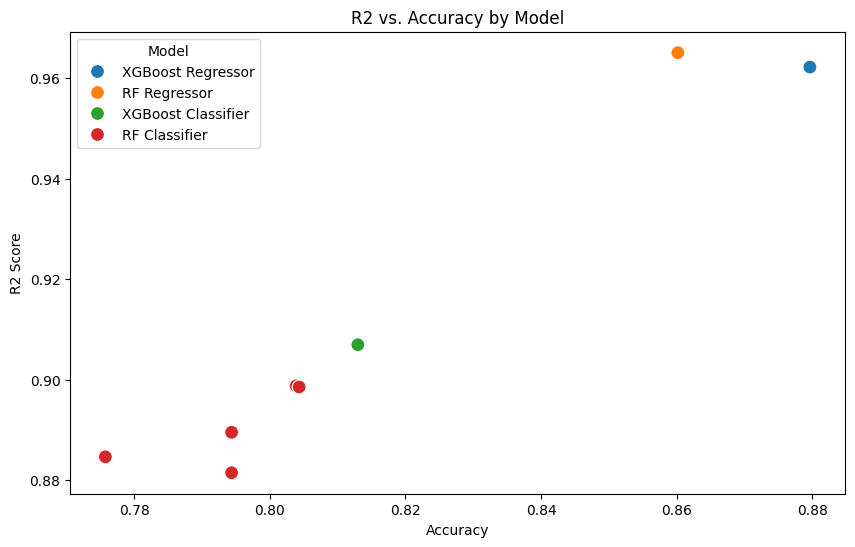

In [209]:
# R2 vs Accuracy by model
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Accuracy', y='R2', hue='Model', data=results, s=100)
plt.title('R2 vs. Accuracy by Model')
plt.xlabel('Accuracy')
_ = plt.ylabel('R2 Score')

How accurately do your models predict the students’ final grade and how do these models compare against each other?
- As we can see from the sorted dataframe, the accuracy ranges from about 78% to 89%. This accuracy is not the best, but there is little data to learn from. Just for reference, using cross-validation reduced the accuracy. Using train-test split made accuracy go as high as 92%. Additionally, combining columns for mini projects, peer reviews and quizzes all in one also increased accuracy to 96%, while accumulating all statistics columns increased it to 100%, but I decided not to use this since it could be overfitting and important information could be lost.
- I decided to use XGBoost and Random Forest as both classifiers and regressors, because I was curious to see how they would compare against each other. They are both ensable learning methods that combine multiple decision trees to make predictions, but they have their differences.
- Predictions of regression models are rounded to the nearest integer and then treated as classifiers, in order to be able to be compared directly to classification models.

Which one is better? Could you explain why?
- In general we can see that regression models performed better than classification models. Their accuracy, mean squared error and r2 error are all better than the classification models, which leads me to believe that even though this can be treated as a classification problem with 6 classes ([0-5]), it is better to treat it as a regression problem.
- Additionally, we can notice that XGBoost outperforms Random Forest in both approaches.
- Research shows that XGBoost often outperforms Random Forest in regression tasks due to its ability to handle more complex patterns in the data and perform better optimization, more on this topic in the report.

How are your models performing?
- Given the dataset size and option to use cross-validation in order to generalize the models, they are performing well. From the confusion matrices it can be observed that the models struggle with grades 3 and 4 the most, usually predicting them as each other, but grade 4 gets mistaken for grade 5 as well.

Do you need to change anything in your model?
- I tried grid search for hyperparameter tuning, but it did not produce better results so I left it. If going only for the maximum accuracy, manipulation of data in the sense of accumulation leads to better results, but it is a question how generalized this is since the dataset is very small. Better hyperparameter space exploration is always an option to try to predict better.

# Important features

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
Model       XGBoost Regressor
n                         100
MSE                  0.147619
R2                   0.962189
Accuracy             0.879654
Name: 0, dtype: object
              precision    recall  f1-score   support

           0       0.98     

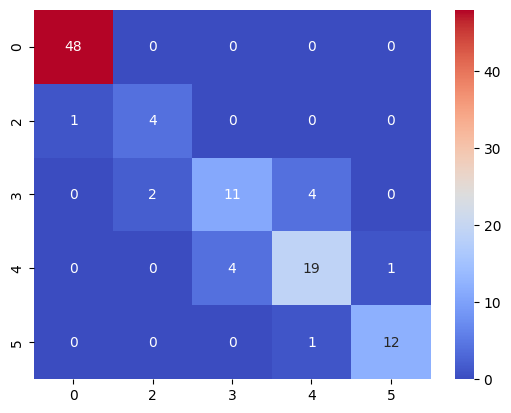

In [210]:
print(best_model)
print(results.loc[0])
print(best_class_report)

sns.heatmap(best_cm, annot=True, cmap='coolwarm')
plt.show()

In [211]:
feature_importances = best_model.feature_importances_

# Create a DataFrame to display feature names and their importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top 3 features
top_3_features = importance_df.head(3)
print(top_3_features)

      Feature  Importance
0          MP    0.969770
1        Quiz    0.007573
7  Week6_Stat    0.007007


What are the three most important features in predicting students’ final grade?

The three most important features for my model are:

*   Accumulated **scores for mini projects**
*   Accumulated **statistics for Week1**
*   Accumulated **scores for quizzes**